In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


''' Facial expressions of women with bipolar disorder while being interviewed -- reporting the emotional valence 
of various emotions based on Paul Ekman's theory of facila expression in emotions '''

# The end project of this project will display the emotion with the highest valence per every minute.

# Import the data CSV as dataframe (https://www.kaggle.com/sivlemx/facial-expression-of-emotion), fills reading from file requirement
df = pd.read_csv('facial_expression.csv')

print('-------- Data Cleansing & Analysis --------')

# Show full df with all columns 
cols = df.columns 

# What are the data types
print(df.dtypes) # shows all as objects since data is different


# Delete columns not using for this project (everything but timestamp, age, ethnicity and emotions)

remove_columns = df.drop(['Age', 'Beard', 'Moustache', 'Glasses', 'Ethnicity', 'Y - Head Orientation', 'X - Head Orientation', 'Z - Head Orientation',	'Quality',	'Mouth', 'Left Eye', 'Right Eye', 'Left Eyebrow', 'Right Eyebrow', 'Gaze Direction', 'Identity', 'Action Unit 01 - Inner Brow Raiser', 'Action Unit 02 - Outer Brow Raiser', 'Action Unit 04 - Brow Lowerer', 'Action Unit 05 - Upper Lid Raiser', 'Action Unit 06 - Cheek Raiser', 'Action Unit 07 - Lid Tightener', 'Action Unit 09 - Nose Wrinkler', 'Action Unit 10 - Upper Lip Raiser', 'Action Unit 12 - Lip Corner Puller', 'Action Unit 14 - Dimpler', 'Action Unit 15 - Lip Corner Depressor', 'Action Unit 17 - Chin Raiser', 'Action Unit 18 - Lip Puckerer', 'Action Unit 20 - Lip Stretcher', 'Action Unit 23 - Lip Tightener', 'Action Unit 24 - Lip Pressor', 'Action Unit 25 - Lips Part', 'Action Unit 26 - Jaw Drop', 'Action Unit 27 - Mouth Stretch', 'Action Unit 43 - Eyes Closed', 'Heart Rate', 'Stimulus', 'Event Marker', 'Valence', 'Arousal', 'Gender'], axis=1, inplace = True)

# What are the datatypes now
print(df.dtypes)

'''Remove rows with no applicable values for project - Below code removes all values that have text we don't want. 
When I reviewed the data, all text also had underscore (_) so this was easiest way to remove'''
df = df[~df['Neutral'].str.contains('_')] 
df = df[~df['Sad'].str.contains('_')]
df = df[~df['Angry'].str.contains('_')]
df = df[~df['Surprised'].str.contains('_')]
df = df[~df['Scared'].str.contains('_')]
df = df[~df['Disgusted'].str.contains('_')]
df = df[~df['Contempt'].str.contains('_')]

# What are the datatypes now

print(df.dtypes) #still objects

# Remove strange characters in Video Time Column and create new

df['Video By Minute'] = df['Video Time'].str.split(':').str[1]

# Remove original video time

remove_VT = df.drop(['Video Time'], axis = 1, inplace = True)

# move Video By Minute to front of column list 

VBM = df['Video By Minute']
df.drop(labels=['Video By Minute'], axis=1,inplace = True)
df.insert(0, 'Video By Minute', VBM)


# turn data types from objects to integers and test that it works
df = df.astype({'Video By Minute': object, 'Neutral': float, 'Sad': float, 'Angry': float, 'Surprised': float, 'Scared': float, 'Disgusted': float, 'Contempt': float})

# df = df.astype(float)
neutral = df['Neutral'].sum()
print(neutral)


# Group by Video By Minute and sum up emotions 


VBMSum = df.groupby(['Video By Minute'])[['Neutral', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted', 'Contempt']].sum()
print(VBMSum)
df.groupby('Video By Minute')
print(VBMSum.sum())




-------- Data Cleansing & Analysis --------
Video Time                               object
Neutral                                  object
Happy                                    object
Sad                                      object
Angry                                    object
Surprised                                object
Scared                                   object
Disgusted                                object
Contempt                                 object
Valence                                  object
Arousal                                  object
Gender                                   object
Age                                      object
Beard                                    object
Moustache                                object
Glasses                                  object
Ethnicity                                object
Y - Head Orientation                     object
X - Head Orientation                     object
Z - Head Orientation                     obj

-------- Data Visualization --------
-------- Spread of EmotionValence Overall --------
     emotion  weight
0    Neutral    1914
1        Sad     259
2      Angry      37
3  Surprised     529
4     Scared     108
5  Disgusted      15
6   Contempt      58
AxesSubplot(0.125,0.125;0.775x0.755)


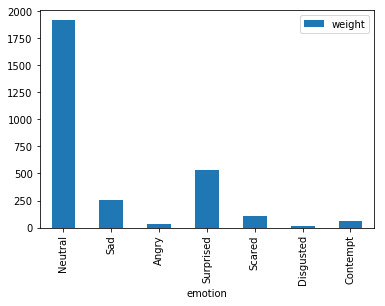

In [13]:

# visualize this data somehow

#                    Neutral         Sad     Angry   Surprised     Scared  Disgusted   Contempt
# Video By Minute                                                                               
# 00               150.515273    7.949797  1.628059   48.230298   4.956604   0.695079   1.970558 Surprised
# 01               189.180588    4.602587  2.261194  101.301533   7.949376   0.376798   7.009033 Surprised
# 02               130.623561    8.078115  3.051141   38.986803  11.312380   0.387373  21.856211 Surprised
# 03               228.022102  103.834725  4.176626   43.250004  15.796589   1.900111  14.461138	'Sad'
# 04                82.889620    1.845728  0.956644   49.012788   5.089550   0.117171   0.996634	'Surprised'
# 05                45.470826    1.847375  0.304314    8.673008   1.825834   0.088452   0.643038	'Surprised'
# 06                85.133029    2.578528  0.686519   39.648941   2.778145   0.716243   0.013526 'Surprised 
# 07                82.691717    1.620730  0.504221   19.070657   1.652793   0.175271   1.595056 'Surprised'
# 08                71.260234    3.687649  1.092977   17.098145   1.081029   0.284020   0.022785 'Surprised'
# 09                80.258926    5.394954  1.683424   15.906133   4.270221   0.278521   1.270695 'Surprised'
# 10                50.948251    5.323589  2.055602   16.410894   7.540229   0.616785   0.777072 ''
# 11                44.668957    0.385815  1.468840    2.319041   7.297903   0.240924   0.030741 'Scared'
# 12                75.301425    7.678822  0.964345   17.241497   4.015218   0.258790   0.094541 ''
# 13               132.366236    9.249196  0.719178   30.381184   7.348017   0.683498   1.051930 'Surprised'
# 14                52.012576    4.951623  1.205320   11.005992   2.827762   0.266612   1.509634 ''
# 15               107.845520    8.383424  2.196770   22.207580   3.418357   0.441555   0.405279 'Surprised'
# 16               100.052627   23.677206  2.852520   14.409438   9.346021   2.898670   1.109812 ''
# 17                28.844223   13.401508  2.931089    2.886346   2.146237   1.354300   0.036903 'Sad'
# 18                47.499705   21.018751  3.059818    0.596924   1.146805   1.309496   1.529552 ''
# 19                34.852892   11.762436  1.143492    3.827270   1.340912   0.534321   0.169681 'Sad'
# 20                37.208534    1.586032  0.256910    3.221547   4.143441   0.080302   0.202675 ''
# 21                56.003213    9.795564  1.542356   23.732903   1.042384   1.523721   1.647921 'Surprised'
# Neutral      1913.650035
# Sad           258.654152
# Angry          36.741359
# Surprised     529.418930
# Scared        108.325805
# Disgusted      15.228013
# Contempt       58.404414
print('-------- Data Visualization --------')


# Spread of EmotionValence Overall
print('-------- Spread of EmotionValence Overall --------')

OverallEmotion = pd.DataFrame({
	'emotion':['Neutral', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted', 'Contempt'], 
	'weight':[1914, 259, 37, 529, 108, 15, 58]
	}) 

print(OverallEmotion)
print(OverallEmotion.plot(x = 'emotion', kind="bar"))




-------- Neutral is always the highest by minute, but this is the highest emotion removing Neutral, every 2 minutes --------
    weight highest emotion
0      101       Surprised
1      103             Sad
2        8       Surprised
3       19       Surprised
4       15       Surprised
5        7          Scared
6       30       Surprised
7       22       Surprised
8       13             Sad
9       11             Sad
10      24       Surprised
AxesSubplot(0.125,0.125;0.775x0.755)


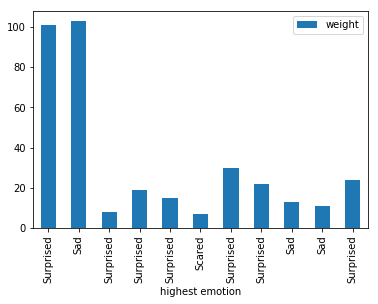

In [14]:

# Neutral is always the highest by minute, but this is the highest emotion removing Neutral, every 2 minutes

print('-------- Neutral is always the highest by minute, but this is the highest emotion removing Neutral, every 2 minutes --------')

EmotionByMinute = pd.DataFrame({
		'weight': [101, 103, 8, 19, 15, 7, 30, 22, 13, 11, 24],
		'highest emotion': ['Surprised', 'Sad', 'Surprised', 'Surprised', 'Surprised', 'Scared', 'Surprised', 'Surprised', 'Sad', 'Sad', 'Surprised']
	})

print(EmotionByMinute)
print(EmotionByMinute.plot(x='highest emotion',  kind="bar"))

In [15]:


# Create class that connects to dataframe and displays the df
print('-------- Create class that connects to dataframe and displays it --------')

class DataFrame(object):
    def __init__(self, df, **Arg):
       self.df = df ##df is a pd.DataFrame
    def EmotionSums(self, Neutral):
         dfneutral = self.df[self.df['Neutral'] == Neutral]
         return dfneutral

test = DataFrame(df)

print(test.EmotionSums(df['Neutral']))


# Create dict with Minute as the index 

data_dict = df.set_index('Video By Minute').to_dict('series') 

print(data_dict) 

# Call dict another way

print('--------ANOTHER WAY OF PRINTING THE DICT--------')
for k, v in data_dict.items():
    print( k, v)



-------- Create class that connects to dataframe and displays it --------
      Video By Minute   Neutral  ...     Disgusted      Contempt
31                 00  0.582615  ...  0.000000e+00  0.000000e+00
32                 00  0.601628  ...  2.429405e-03  8.838630e-04
33                 00  0.615537  ...  4.597873e-03  6.169670e-04
34                 00  0.623073  ...  4.167456e-03  4.306630e-04
35                 00  0.609928  ...  3.967290e-03  3.006180e-04
36                 00  0.589634  ...  5.259633e-03  2.098410e-04
37                 00  0.570016  ...  4.143620e-03  1.464760e-04
38                 00  0.538388  ...  3.837625e-03  1.022450e-04
39                 00  0.512335  ...  5.263730e-03  7.137100e-05
40                 00  0.509690  ...  3.770516e-03  4.981900e-05
41                 00  0.510663  ...  2.631947e-03  3.477500e-05
42                 00  0.515014  ...  1.837188e-03  2.427400e-05
43                 00  0.525772  ...  1.282420e-03  1.694400e-05
44              